In [ ]:
import os

# Set up the root directory and plots directory for Jupyter Notebook
root_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))  # Move to the project root
plots_dir = os.path.join(root_dir, "plots")

# Ensure the plots directory exists
os.makedirs(plots_dir, exist_ok=True)
print(f"Plots will be saved in: {plots_dir}")



In [ ]:
import pandas as pd

# Load the cleaned data
cleaned_data = pd.read_csv('src/cleaned_data.csv')

# Verify the data
print("Data Info:")
print(cleaned_data.info())  # Check the structure and missing values
print("\nSample Data:")
print(cleaned_data.head())  # View first few rows
  # View first few rows


In [ ]:
import pandas as pd

# Load the cleaned data
cleaned_data = pd.read_csv('src/cleaned_data.csv')

# Display the first few rows to confirm loading
print(cleaned_data.head())


In [34]:
import pandas as pd

# Load the raw data
data_path = 'src/data.csv'  # Make sure this path is correct
raw_data = pd.read_csv(data_path)


In [ ]:
# Drop rows with missing headline, publisher, or date
cleaned_data = raw_data.dropna(subset=['headline', 'publisher', 'date'])

# Standardize text fields (e.g., strip extra spaces, lowercase publisher)
cleaned_data['headline'] = cleaned_data['headline'].str.strip()
cleaned_data['publisher'] = cleaned_data['publisher'].str.lower()


# Convert the 'date' column to datetime format with proper handling
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], errors='coerce', utc=True)


# Drop rows where 'date' could not be parsed
cleaned_data = cleaned_data.dropna(subset=['date'])
print(f"Data shape after fixing 'date': {cleaned_data.shape}")


# Drop duplicates
cleaned_data = cleaned_data.drop_duplicates()

# Check the cleaned data
print("Cleaned Data Info:")
print(cleaned_data.info())


In [ ]:
# Save the cleaned dataset to a CSV file
cleaned_data.to_csv('src/cleaned_data.csv', index=False)
print("Cleaned data saved to 'src/cleaned_data.csv'")


In [ ]:
# Clean and standardize text fields
raw_data['headline'] = raw_data['headline'].str.strip()
raw_data['publisher'] = raw_data['publisher'].str.lower().str.strip()


In [ ]:
# Save cleaned data to a new file
raw_data.to_csv('src/cleaned_data.csv', index=False)
print("Cleaned data saved to 'src/cleaned_data.csv'")


In [ ]:
cleaned_data = pd.read_csv('src/cleaned_data.csv')
print(cleaned_data.info())
print(cleaned_data.head())


In [9]:
data_path = os.path.join(os.getcwd(), '..', 'src', 'data.csv')


In [10]:
data_path = 'C:/Users/Hp/Music/Projectss/week 1/src/data.csv'


In [11]:
os.chdir('C:/Users/Hp/Music/Projectss/week 1/')


Headline Length Statistics:
count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64

Top Publishers by Article Count:
publisher
benzinga newsdesk    14750
lisa levin           12408
etf professor         4362
paul quintaro         4212
benzinga newsdesk     3177
benzinga insights     2332
vick meyer            2128
charles gross         1790
hal lindon            1470
benzinga_newsdesk     1239
Name: count, dtype: int64


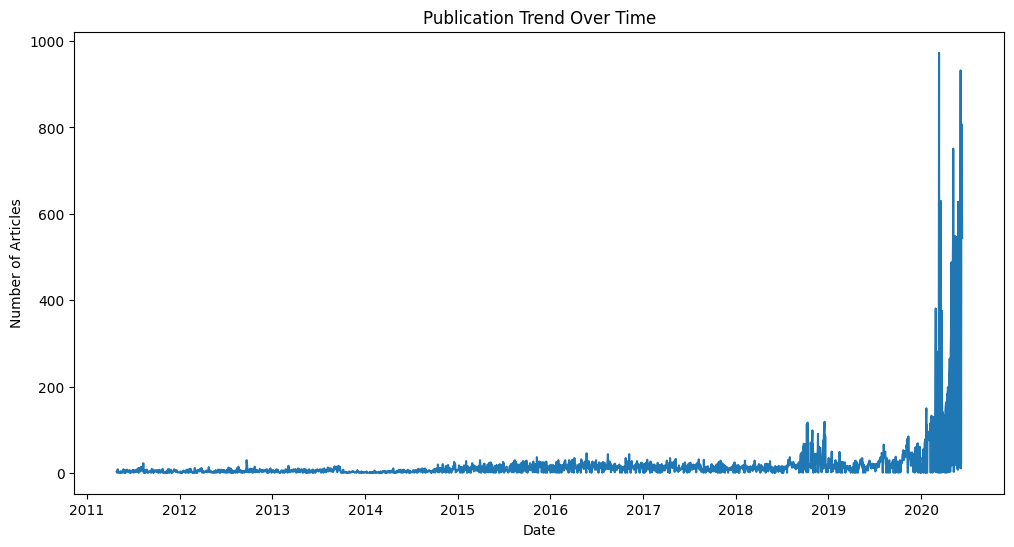

In [42]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure 'plots' directory exists
plots_dir = 'plots'  # Relative path to the 'plots' directory
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Headline lengths
cleaned_data['headline_length'] = cleaned_data['headline'].apply(len)
print("Headline Length Statistics:")
print(cleaned_data['headline_length'].describe())

# Articles per publisher
publisher_counts = cleaned_data['publisher'].value_counts()
print("\nTop Publishers by Article Count:")
print(publisher_counts.head(10))

# Publication trends over time
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], utc=True)  # Ensure 'date' is datetime
cleaned_data['publication_date'] = cleaned_data['date'].dt.date
date_counts = cleaned_data['publication_date'].value_counts().sort_index()

# Plot publication trends
plt.figure(figsize=(12, 6))
date_counts.plot()
plt.title('Publication Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')

# Save the plot in the 'plots' directory
plt.savefig(os.path.join(plots_dir, 'publication_trends.png'))  # Save the plot
plt.show()


In [43]:
# Import necessary libraries for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK data
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'headline' column
cleaned_data['sentiment_score'] = cleaned_data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on the score
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

cleaned_data['sentiment'] = cleaned_data['sentiment_score'].apply(classify_sentiment)

# View the first few rows with sentiment classifications
cleaned_data[['headline', 'sentiment']].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,headline,sentiment
0,Stocks That Hit 52-Week Highs On Friday,neutral
1,Stocks That Hit 52-Week Highs On Wednesday,neutral
2,71 Biggest Movers From Friday,neutral
3,46 Stocks Moving In Friday's Mid-Day Session,neutral
4,B of A Securities Maintains Neutral on Agilent...,positive


sentiment
neutral     37411
positive    13706
negative     4870
Name: count, dtype: int64


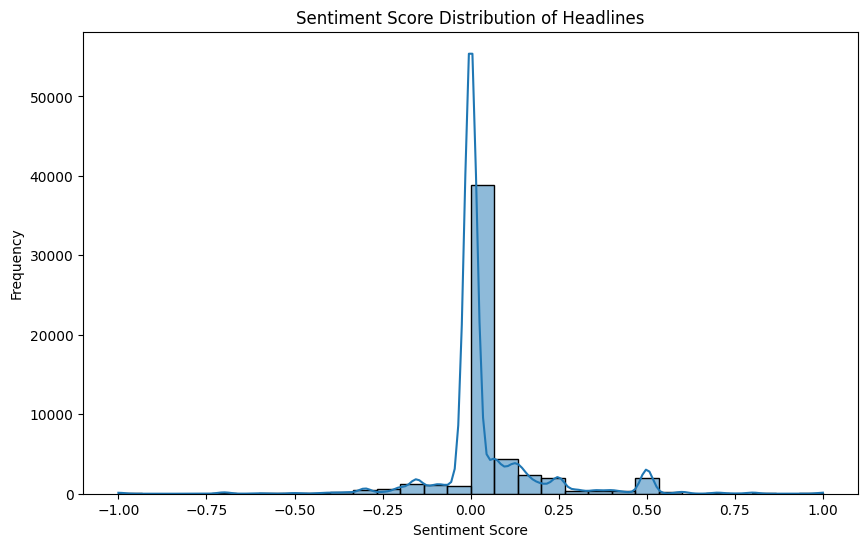

In [47]:
from textblob import TextBlob
import pandas as pd

# Assuming 'cleaned_data' is the DataFrame containing the news headlines

# Function to calculate sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # Sentiment polarity score (-1 to 1)
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis on the 'headline' column
cleaned_data['sentiment'] = cleaned_data['headline'].apply(get_sentiment)

# Add a sentiment score for visualization
cleaned_data['sentiment_score'] = cleaned_data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Show the sentiment breakdown
print(cleaned_data['sentiment'].value_counts())

# Visualize sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['sentiment_score'], kde=True, bins=30)
plt.title('Sentiment Score Distribution of Headlines')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1:
['new', 'reports', 'est', 'q1', 'top', 'benzingas', 'vs', 'sales', 'yoy', 'eps']

Topic 2:
['price', 'shares', 'reports', 'update', 'scheduled', 'buy', 'market', 'etf', 'announces', 'earnings']

Topic 3:
['lowers', 'raises', 'premarket', 'midday', 'stocks', 'maintains', 'target', 'price', 'moving', 'session']

Topic 4:
['tuesday', 'wednesday', 'friday', 'estimate', 'thursday', 'highs', 'lows', 'stocks', '52week', 'hit']

Topic 5:
['new', 'lower', 'several', 'companies', 'trading', 'shares', 'etfs', 'yesterday', 'biggest', 'movers']



ModuleNotFoundError: No module named 'pyLDAvis.sklearn'

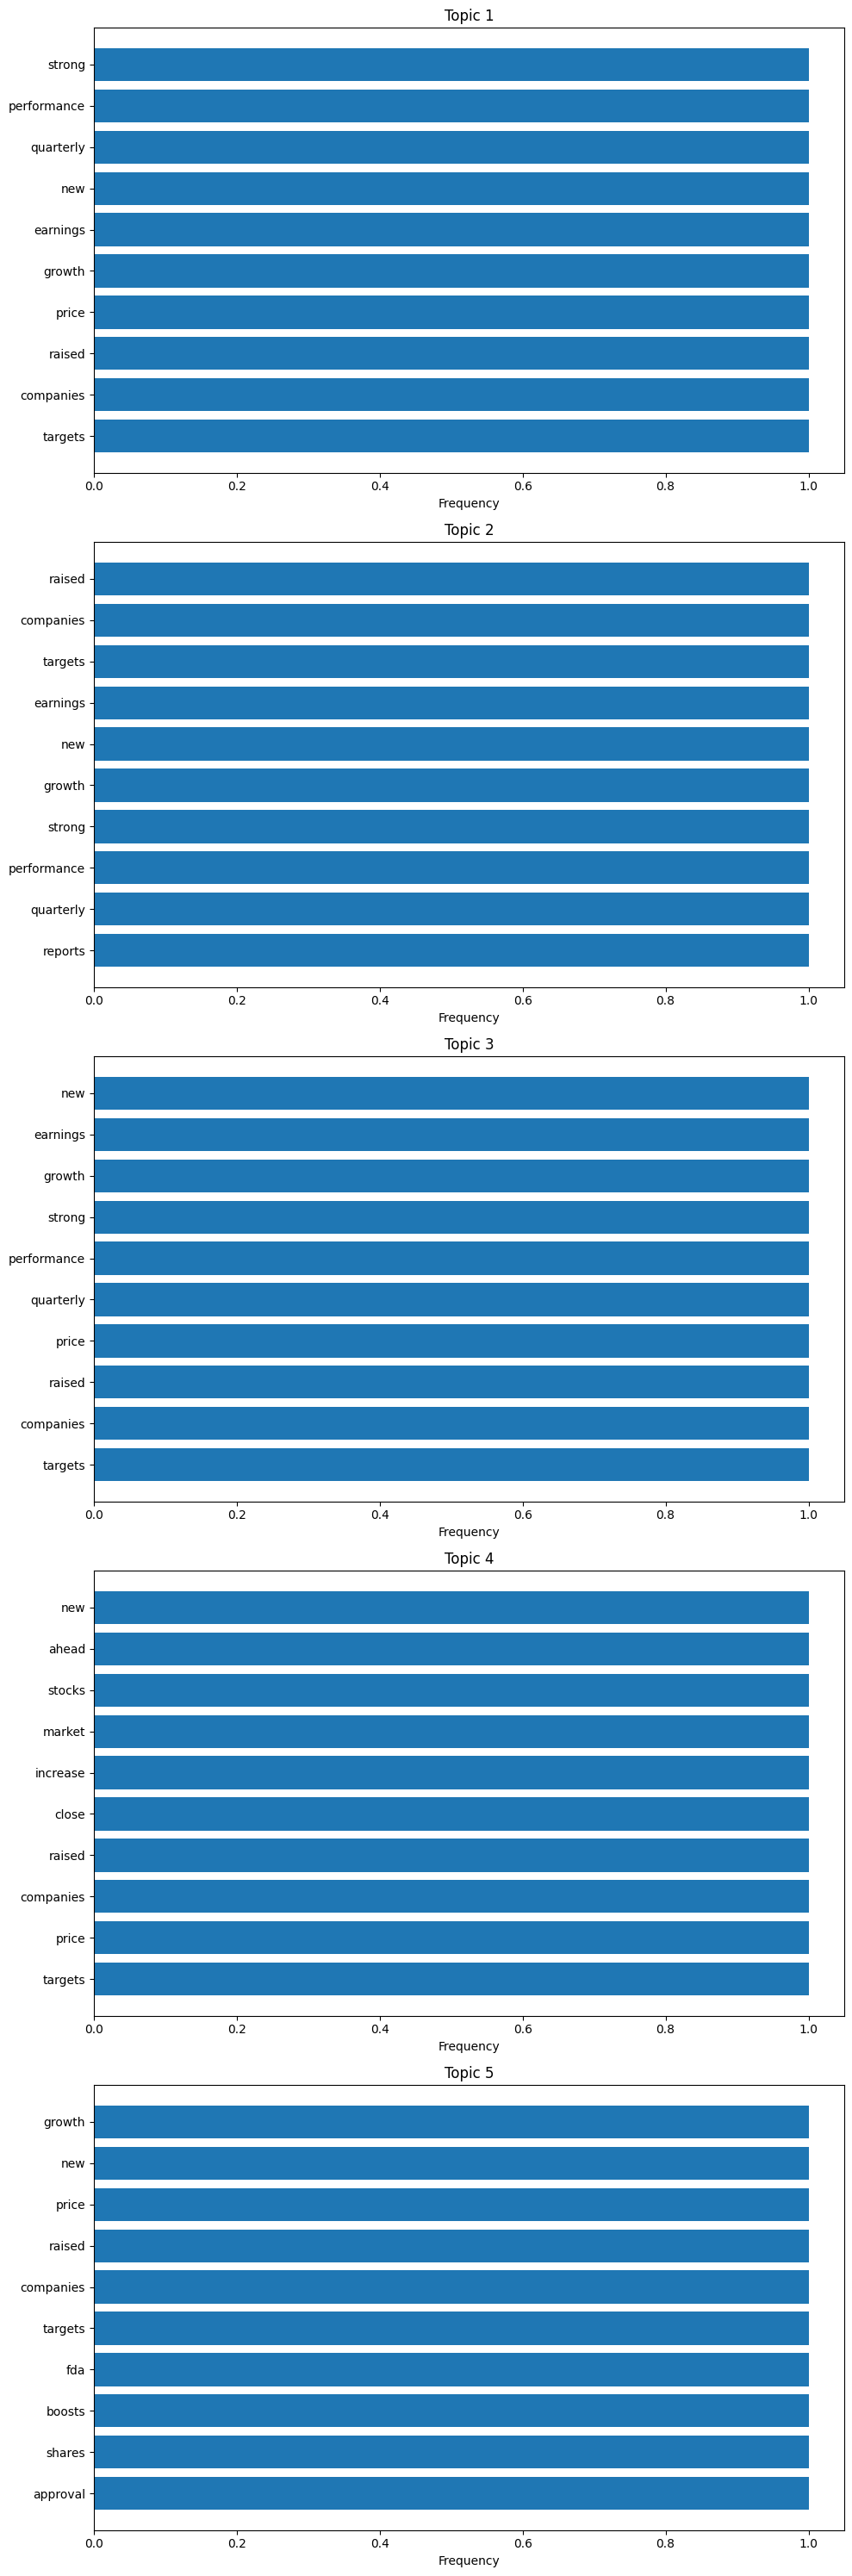

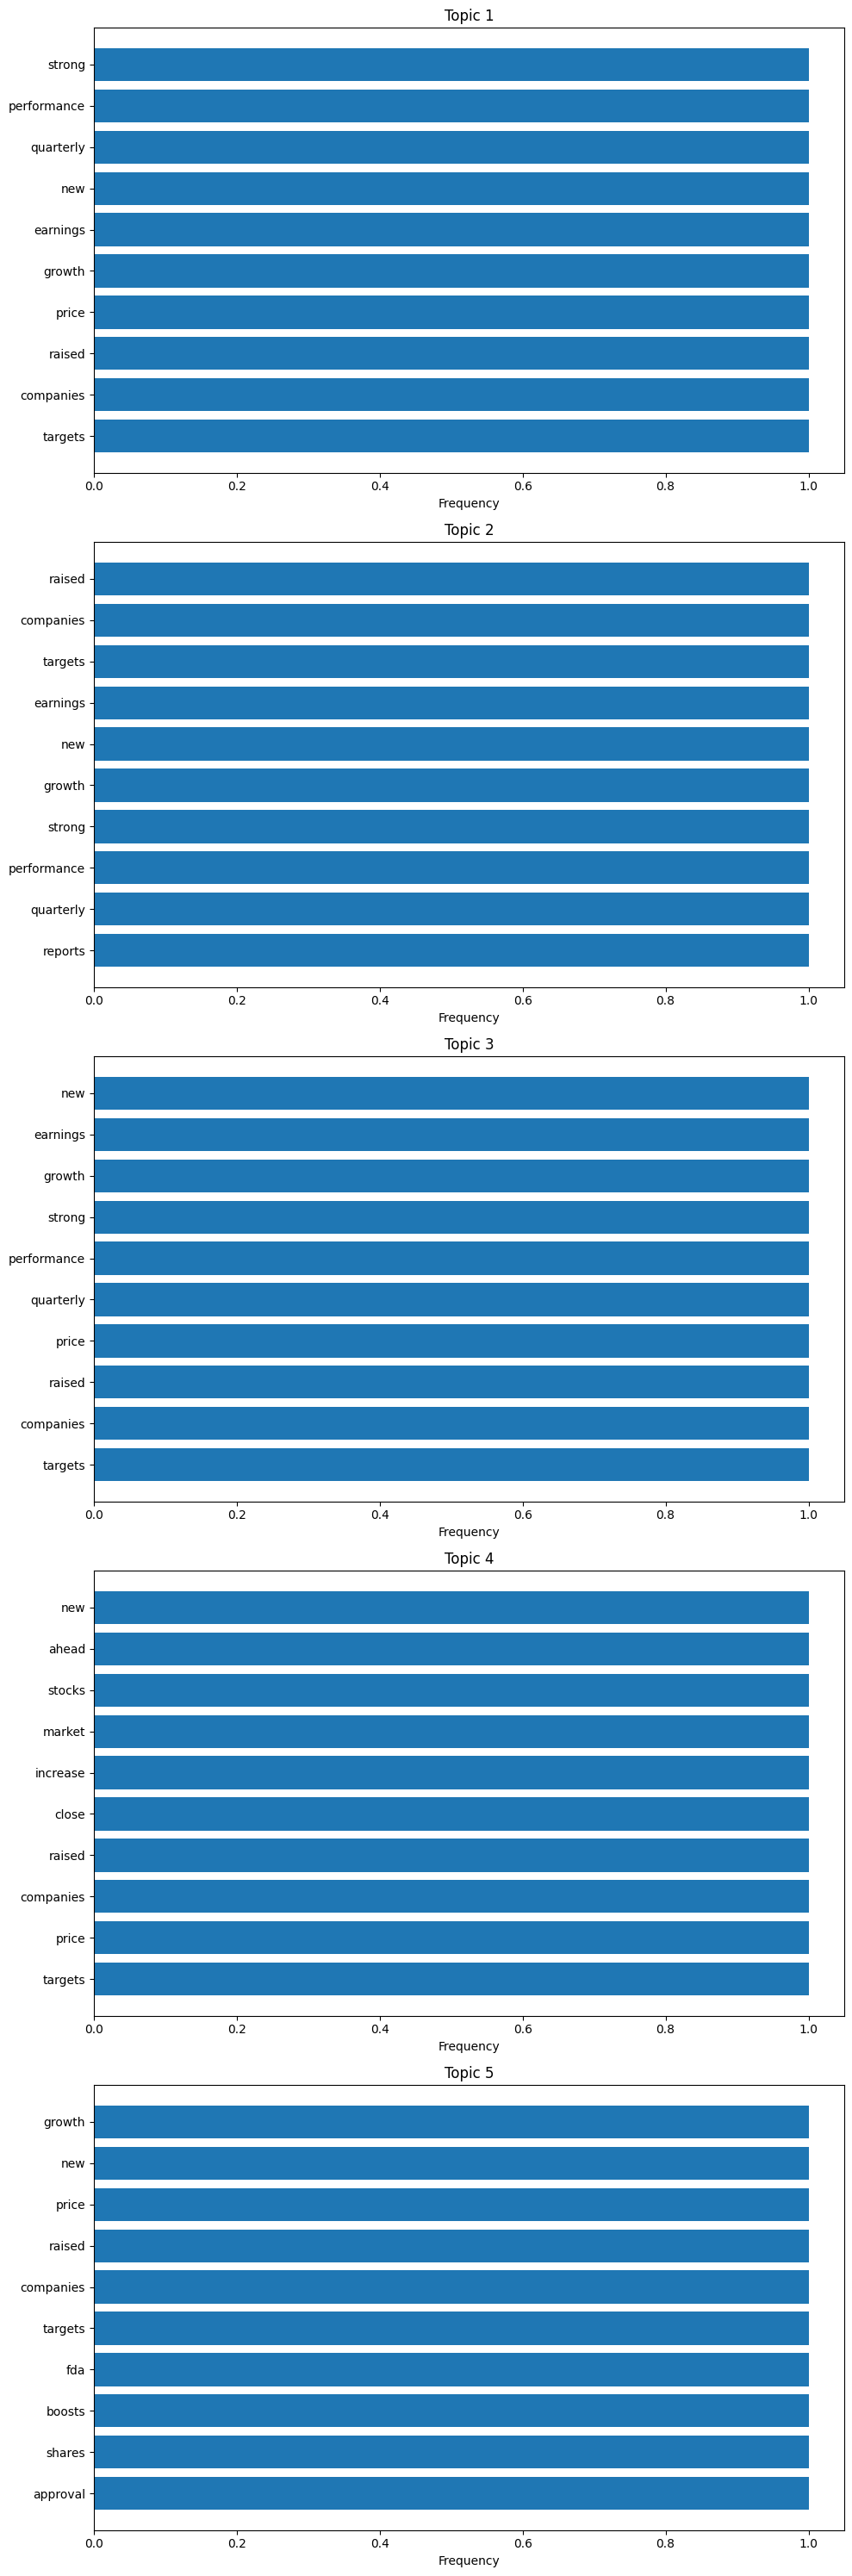

In [55]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Sample data (headlines)
documents = [
    "FDA approval boosts shares",
    "Price targets raised for companies",
    "New reports on earnings growth",
    "Stocks increase ahead of market close",
    "Reports show strong quarterly performance"
]

# Step 1: Vectorize the documents
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Step 2: Train the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Step 3: Get the top words from each topic
def get_top_words(lda_model, vectorizer, n_top_words=10):
    terms = vectorizer.get_feature_names_out()
    topic_words = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_indices = topic.argsort()[-n_top_words:][::-1]
        top_words = [terms[i] for i in top_indices]
        topic_words.append(top_words)
    return topic_words

n_top_words = 10  # Display top 10 words
topic_words = get_top_words(lda_model, vectorizer, n_top_words)

# Step 4: Plot the top words for each topic
num_topics = len(topic_words)
fig, axes = plt.subplots(num_topics, 1, figsize=(10, 6 * num_topics))

for i, top_words in enumerate(topic_words):
    axes[i].barh(range(len(top_words)), [1] * len(top_words), align='center')
    axes[i].set_yticks(range(len(top_words)))
    axes[i].set_yticklabels(top_words)
    axes[i].set_xlabel('Frequency')
    axes[i].set_title(f'Topic {i + 1}')

plt.tight_layout()
plt.show()

num_topics = len(topic_words)
fig, axes = plt.subplots(num_topics, 1, figsize=(10, 6 * num_topics))

for i, top_words in enumerate(topic_words):
    axes[i].barh(range(len(top_words)), [1] * len(top_words), align='center')
    axes[i].set_yticks(range(len(top_words)))
    axes[i].set_yticklabels(top_words)
    axes[i].set_xlabel('Frequency')
    axes[i].set_title(f'Topic {i + 1}')

plt.tight_layout()
plt.show()



In [ ]:
# Import necessary libraries for topic modeling
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')

# Preprocess headlines: remove stopwords
stop_words = set(stopwords.words('english'))
cleaned_data['processed_headline'] = cleaned_data['headline'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

# Vectorize the headlines using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_data['processed_headline'])

# Apply LDA for topic modeling
num_topics = 5  # You can adjust the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf_matrix)

# Display the topics
terms = tfidf_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[-10:]]))  # Display top 10 words for each topic
    print("\n")


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the cleaned data
cleaned_data = pd.read_csv('src/cleaned_data.csv')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def calculate_sentiment(headline):
    sentiment_score = sia.polarity_scores(headline)
    return sentiment_score['compound']

# Apply sentiment analysis to the 'headline' column
cleaned_data['sentiment_score'] = cleaned_data['headline'].apply(calculate_sentiment)

# Save the data with sentiment scores
cleaned_data.to_csv('src/cleaned_data_with_sentiment.csv', index=False)

# Check the output
print("Sentiment Analysis Results:")
print(cleaned_data[['headline', 'sentiment_score']].head())





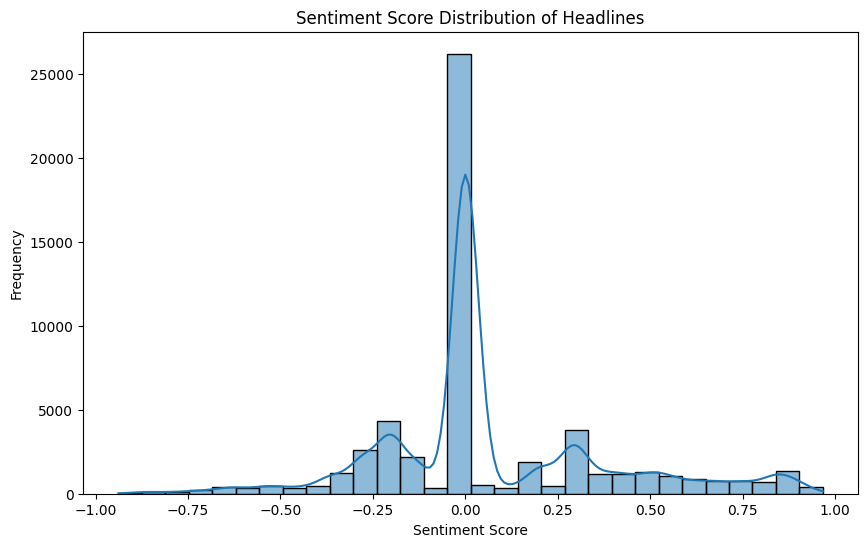

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the data with sentiment scores
cleaned_data_with_sentiment = pd.read_csv('src/cleaned_data_with_sentiment.csv')

# Create the plots directory if it doesn't exist
plots_dir = 'plots'  # Relative path to the 'plots' directory
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data_with_sentiment['sentiment_score'], kde=True, bins=30)
plt.title('Sentiment Score Distribution of Headlines')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Save the plot in the plots folder
plt.savefig(os.path.join(plots_dir, 'sentiment_score_distribution.png'))

# Display the plot
plt.show()


In [15]:
# Save the sentiment results to a new CSV
cleaned_data_with_sentiment.to_csv('src/cleaned_data_with_sentiment.csv', index=False)


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Load the cleaned data
cleaned_data = pd.read_csv('src/cleaned_data.csv')  # Adjust path if necessary

# Preprocess the text (remove stopwords)
stop_words = set(stopwords.words('english'))
cleaned_data['processed_headline'] = cleaned_data['headline'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

# Check the first few rows of the cleaned data
cleaned_data.head()


In [4]:
import os
os.chdir('..')  # Moves to the project root directory



In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the headlines using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_data['processed_headline'])



In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Perform LDA for topic modeling
n_topics = 5  # Number of topics you want to extract
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(tfidf_matrix)

# Extract topics and their words
n_top_words = 10  # Number of words per topic
feature_names = tfidf_vectorizer.get_feature_names_out()
topics = []

for topic_idx, topic in enumerate(lda_model.components_):
    topic_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    topics.append(f"Topic {topic_idx + 1}: " + " ".join(topic_words))

# Output the topics
for topic in topics:
    print(topic)


In [29]:
# Save the topics to a CSV
topic_df = pd.DataFrame(topics, columns=['Topic'])
topic_df.to_csv('src/topics.csv', index=False)


In [ ]:
file_path = os.path.join(os.getcwd(), '..', 'src', 'cleaned_data.csv')
print("Checking file path:", file_path)
print("File exists:", os.path.exists(file_path))


